In [21]:
import sys
import os.path
import pylab as plt
from zedstat.zedstat import zedstat
import pandas as pd
plt.style.use('fivethirtyeight')

In [22]:
#
# order is order of spline used for smoothing
# alpha is significance level
# prevalence is prevalence of positive class
# 
zt=zedstat(df=pd.read_csv('examples_data/roc2.csv'),
           order=3, 
           total_samples=100000,
           positive_samples=1000,
           alpha=0.1,
           prevalence=.01)

In [23]:
# compute smoothened roc and other performance measures
zt.smooth(STEP=0.001)
zt.allmeasures(interpolate=True)
zt.usample(precision=3)
zt.getBounds()

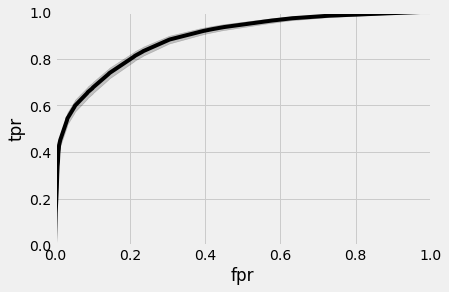

In [24]:
ax=plt.gca()
ax=zt.get().tpr.plot(ax=ax,color='k')
plt.fill_between(x=zt.get().index, y1=zt.df_lim['U'].tpr,y2=zt.df_lim['L'].tpr, color='k',alpha=.2)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_ylabel('tpr');

(0.0, 1.0)

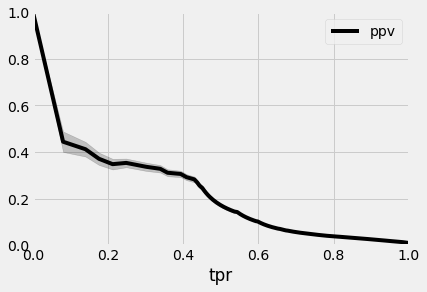

In [25]:
ax=plt.gca()
ax=zt.get().plot(ax=ax,x='tpr',y='ppv',color='k')
plt.fill_between(x=zt.get()['tpr'], y1=zt.df_lim['U'].ppv,y2=zt.df_lim['L'].ppv, color='k',alpha=.2)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

In [26]:
# compute auc with confidence bounds
zt.auc(alpha=.001)

(0.8875903790087464, 0.9127429179592511, 0.8624378400582415)

In [27]:
# required sample size
zt.samplesize(delta_auc=.1)

26.99420757849582

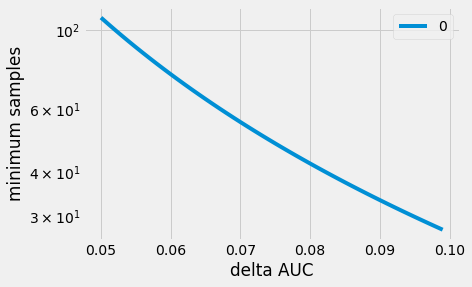

In [28]:
import numpy as np
pd.DataFrame(np.array([zt.samplesize(delta_auc=a) 
                       for a in np.arange(.05,.1,.001)]),
             np.arange(.05,.1,.001)).plot(logy=True)
plt.gca().set_xlabel('delta AUC')
plt.gca().set_ylabel('minimum samples');

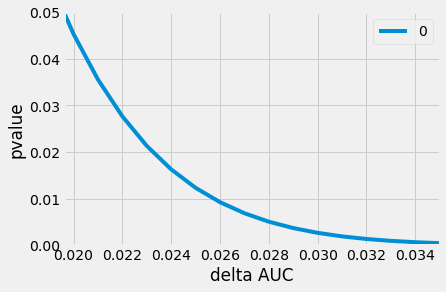

In [29]:
pd.DataFrame([zt.pvalue(delta_auc=a) for a in np.arange(0.001,.1,.001)],
             np.arange(0.001,.1,.001)).plot()
plt.gca().set_ylim(0,0.05)   
plt.gca().set_xlim(0.0196,0.035)   
plt.gca().set_xlabel('delta AUC')
plt.gca().set_ylabel('pvalue');

In [30]:
zt.operating_zone(LRminus=.65)
rf0,txt0=zt.interpret(fpr=zt._operating_zone.fpr.values[0],number_of_positives=10)
rf1,txt1=zt.interpret(fpr=zt._operating_zone.fpr.values[1],number_of_positives=10)
display(zt._operating_zone)
print('high precision operation:\n','\n '.join(txt0))
print('\n')
print('high recall operation:\n','\n '.join(txt1))

,fpr,tpr,ppv,acc,npv,LR+,LR-,threshold
high precision,0.008,0.358115,0.310075,0.985661,0.993507,44.764334,0.647062,0.234186
high sensitivity,0.061,0.611204,0.091855,0.935722,0.995835,10.019732,0.414054,0.032108


high precision operation:
 For every 10 positive instances
 we raise 26 flags,
 out of which 5 are true positives
 21 are false alarms
 5 cases are missed


high recall operation:
 For every 10 positive instances
 we raise 43 flags,
 out of which 6 are true positives
 37 are false alarms
 4 cases are missed


In [31]:
pd.options.display.html.use_mathjax = False
from zedstat.textable import tablewithbounds
xf=tablewithbounds(zt.get(),zt.usample(zt.df_lim['U']),zt.usample(zt.df_lim['L']))#.to_csv('table.csv')
xf.loc[zt._operating_zone.fpr.values]

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.008,$0.358 \pm 0.049$,$0.310 \pm 0.029$,$0.985 \pm 0.000$,$0.993 \pm 0.000$,$44.76 \pm 6.236$,$0.647 \pm 0.050$,0.234186
0.061,$0.611 \pm 0.050$,$0.091 \pm 0.006$,$0.935 \pm 0.000$,$0.995 \pm 0.000$,$10.01 \pm 0.831$,$0.414 \pm 0.054$,0.032108


In [32]:
from zedstat.textable import textable
textable(xf,tabname='tmp.tex',FORMAT='%1.3f',INDEX=True,LNTERM='\\\\\\hline\n')     